In [46]:
import numpy as np
import numpy.linalg
import matplotlib.pyplot as plt

## Markov Chain for Improved Shadowbolt

In [2]:
def get_markov_chain(pc, ph): 
    P = np.zeros((5,5))
    P[0,0] = 1 - ph*pc
    P[0,4] = ph*pc
    P[1,0] = ph*(1-pc)
    P[1,1] = 1-ph
    P[1,4] = ph*pc
    P[2,1] = P[1,0]
    P[2,2] = P[1,1]
    P[2,4] = P[1,4]
    P[3,2] = P[1,0]
    P[3,3] = P[1,1]
    P[3,4] = P[1,4]
    P[4,3] = P[1,0]
    P[4,4] = ph*pc+(1-ph)
    return P

## Markov Chain simulation

In [3]:
def sim_markov_chain(P, x_init, N_steps):
    X = np.zeros((N_steps+1, x_init.shape[0]))
    X[0] = x_init
    for n in range(N_steps):
        X[n+1] = X[n].dot(P)
    return X

In [4]:
plt.close()
plt.figure(figsize=(10,6))

In [5]:
ph = 1-0.1
for pc in [0.01, 0.05, 0.10, 0.15, 0.25, 0.35, .5, .6, .7, .9]:
    P = get_markov_chain(pc, ph)
    x_init = np.array([1,0,0,0,0])
    N_steps = 10
    X = sim_markov_chain(P, x_init, N_steps)
    p_imp_shadowbolt = 1-X[:,0]
    plt.plot(p_imp_shadowbolt, label='crit = {}%'.format(pc*100))

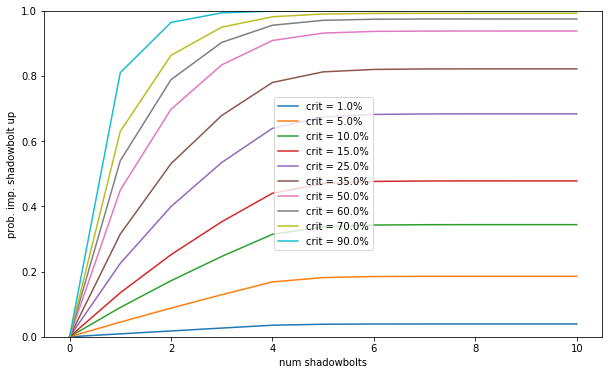

In [6]:
plt.legend()
plt.ylim(0,1)
plt.xlabel('num shadowbolts')
plt.ylabel('prob. imp. shadowbolt up')
plt.show()

## Steady state uptime

In [151]:
def get_steady_state_prob(pc):
    ph = 1
    P = get_markov_chain(pc, ph)
    Z = P
    while np.linalg.norm(Z - Z.dot(Z)) > 10**(-10):
        Z = Z.dot(Z)
    return 1-Z[0,0]

In [158]:
get_steady_state_prob(0.2)

0.59039999999999981